Stars have families too, called galaxies.

In [2]:
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import cluster


import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

C:\Users\neha\AppData\Local\Temp\ipykernel_19232\3345913984.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme


In [3]:
ddir = "universe_8/"
# pos = "Left"
# stars = pd.read_csv(ddir+ f'{pos}/Star_Data.csv') 
# print(stars.keys())
stars = pd.read_csv(ddir + 'combined_stars.csv') 
stars.head(4)
Name, X_stars, Y_stars, rad_velocity, parallax = stars["Name"] , stars["X"], stars["Y"], stars["RadialVelocity"], stars["Parallax"]
print(Y_stars)

0        30.6554
1        30.6115
2        30.6891
3        30.6870
4        30.6622
          ...   
55814   -12.8056
55815    33.0190
55816   -31.4460
55817   -43.8461
55818    39.1916
Name: Y, Length: 55819, dtype: float64


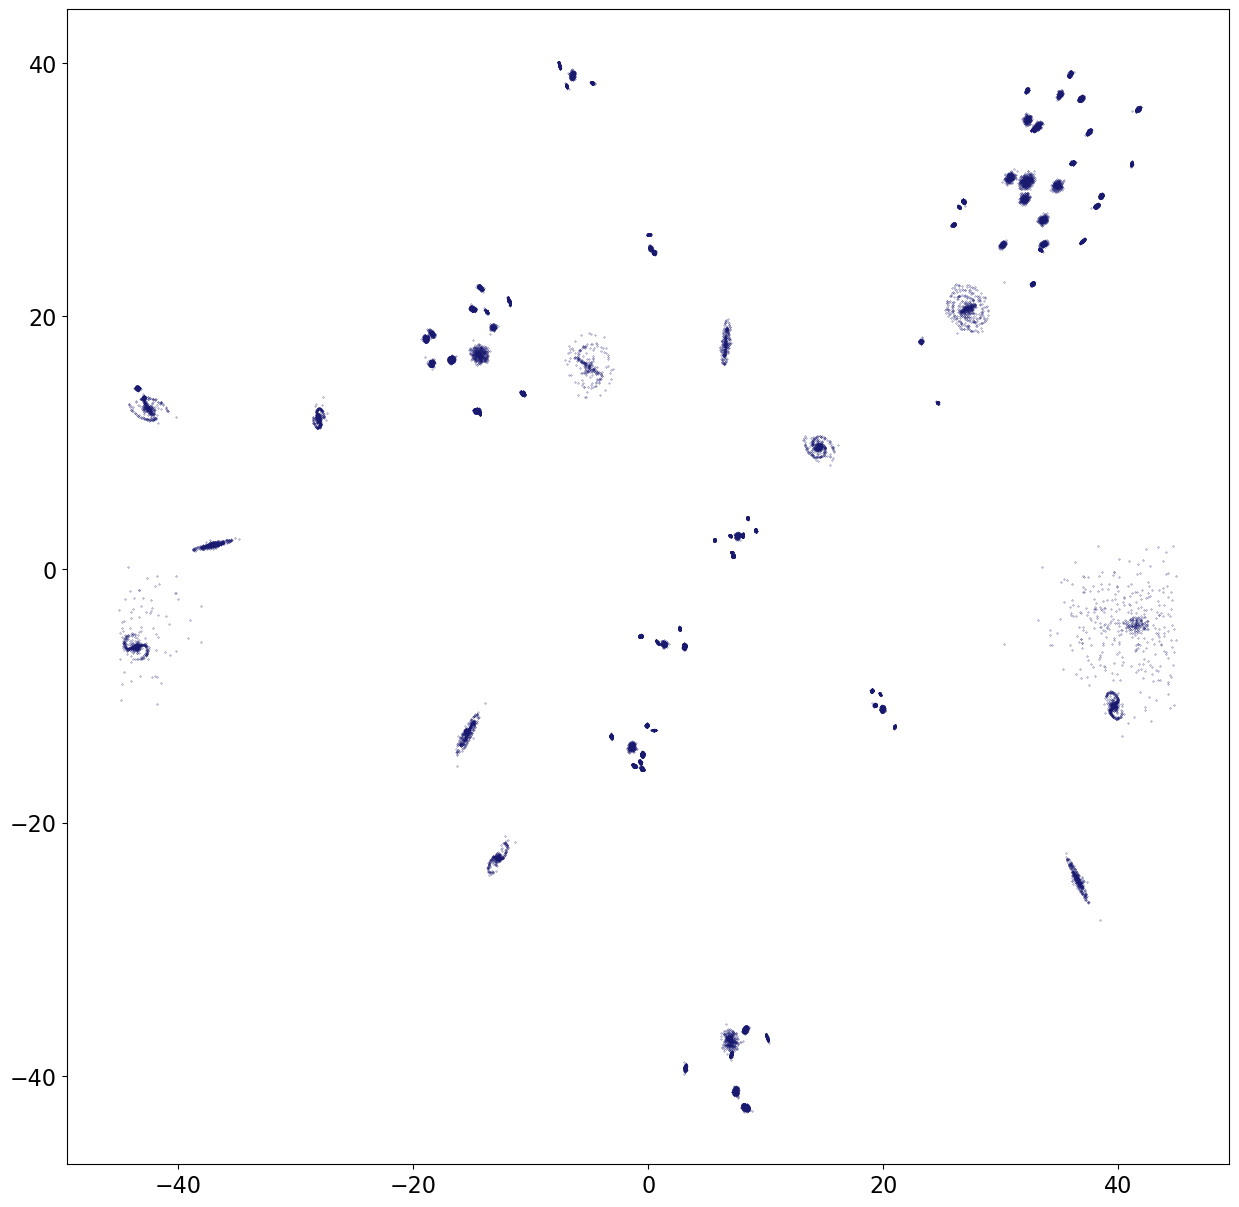

In [4]:
# take the index of the star iff it's above a certain parallax - try to get the far stars
star_index = [i for i, x in enumerate(parallax) if x <= 0.0001]

# find the X and Y pos of the respctive indexes of the far away stars
X_pos = [X_stars[i] for i in star_index]  
Y_pos = [Y_stars[i] for i in star_index]

# plot
fig = plt.figure(figsize=(15, 15))  
ax = fig.add_subplot(1, 1, 1)    
ax.scatter(X_pos, Y_pos, s=0.05, c='midnightblue') 

ax.set_facecolor('white')   
plt.show()  

# i suck at colour theory

In [5]:
coords = np.ndarray((len(X_pos), 2))
for i, equat in enumerate(X_pos):
    coords[i] = [equat, Y_pos[i]] 


clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(coords)


labels = clustering.labels_ 

fig, ax = plt.subplots(figsize=(18, 9))   

for clust in range(0, max(labels) + 1):
    Xk = coords[labels == clust]
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, s=0.02, linewidths=0)
    

ax.scatter(coords[labels == -1, 0], coords[labels == -1, 1], alpha=0.3, s=0.02, linewidths=0) 



fig.savefig('dbscan.png', dpi=1500) 
plt.show()

In [ ]:
positions = np.ndarray((max(labels), 3))
names = np.ndarray((max(labels)), dtype=object)

for clust in range(0, max(labels)):
    indices = np.where(labels == clust)  
    data = stars.iloc[indices] 
    
    Xk = coords[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1])
    meanvel = np.mean(data['RadialVelocity']) 
    positions[clust] = [xcenter, ycenter, meanvel]
    clustername = 'X'+"%05.1f"%xcenter +'-Y'+"%05.1f"%ycenter+'-N'+str(len(Xk)) 
    names[clust] = clustername

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Text(0.5, 0.5, 'Velocity (km/s)')

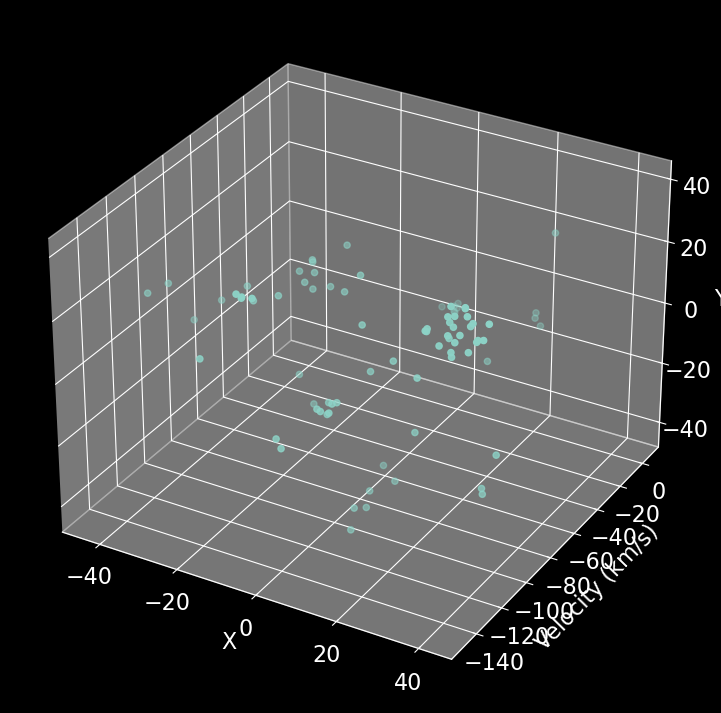

In [ ]:
fig = plt.figure(figsize=(18, 9))
plt.style.use('dark_background')
ax = fig.add_subplot(projection='3d')
c = np.zeros(83, dtype = int)
print(c)
#c = [255, 255, 204]
ax.scatter(positions[:, 0], positions[:, 2], positions[:, 1])

ax.set_xlabel("X"); ax.set_zlabel("Y"); ax.set_ylabel("Velocity (km/s)")